In [1]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf


In [3]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000,32,32,3)
x_test = x_test.reshape(10000,32,32,3)
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')
x_train/=255
x_test/=255#normalize etmek için renklerin rgb değeri 255 e böler ve 0-1 arası değer bulur 
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(32,32,3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax'),])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test,y_test))


170498071/170498071 [==============================] - 2s 0us/step


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
1563/1563 [==============================] - 39s 24ms/step - loss: 1.5867 - accuracy: 0.4311 - val_loss: 1.3583 - val_accuracy: 0.5131
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.2664 - accuracy: 0.5505 - val_loss: 1.2284 - val_accuracy: 0.5705
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1291 - accuracy: 0.6051 - val_loss: 1.2004 - val_accuracy: 0.5788
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0254 - accuracy: 0.6371 - val_loss: 1.2429 - val_accuracy: 0.5646
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9352 - accuracy: 0.6710 - val_loss: 1.1730 - val_accuracy: 0.5939
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8559 - accuracy: 0.6978 - val_loss: 1.1902 - val_accuracy: 0.6064
Epoch 7/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7780 - accuracy: 0.7273 - val_loss: 1.2778 -

In [4]:
_, accuracy=model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 3s 8ms/step - loss: 1.3663 - accuracy: 0.6043
Accuracy: 60.43


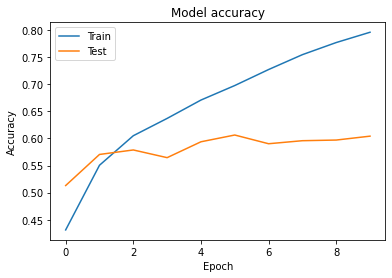

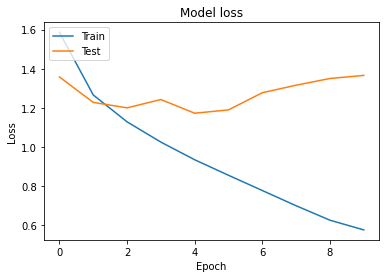

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

test datasında başarı istenilen çıkmadı nöron sayılarına Conv2D değerinden ekleme yaparak başarı oranını artırmaya çalışılır.

In [6]:
import tensorflow as tf

from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000,32,32,3)
x_test = x_test.reshape(10000,32,32,3)
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')
x_train/=255
x_test/=255
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(32,32,3)),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax'),])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test,y_test))


Epoch 1/10
1563/1563 [==============================] - 186s 119ms/step - loss: 1.5502 - accuracy: 0.4365 - val_loss: 1.2301 - val_accuracy: 0.5638
Epoch 2/10
1563/1563 [==============================] - 175s 112ms/step - loss: 1.1035 - accuracy: 0.6099 - val_loss: 1.0792 - val_accuracy: 0.6261
Epoch 3/10
1563/1563 [==============================] - 167s 107ms/step - loss: 0.8983 - accuracy: 0.6858 - val_loss: 1.0577 - val_accuracy: 0.6401
Epoch 4/10
1563/1563 [==============================] - 168s 107ms/step - loss: 0.7275 - accuracy: 0.7450 - val_loss: 0.9820 - val_accuracy: 0.6724
Epoch 5/10
1563/1563 [==============================] - 167s 107ms/step - loss: 0.5639 - accuracy: 0.8011 - val_loss: 1.0960 - val_accuracy: 0.6556
Epoch 6/10
1563/1563 [==============================] - 167s 107ms/step - loss: 0.4149 - accuracy: 0.8531 - val_loss: 1.1720 - val_accuracy: 0.6725
Epoch 7/10
1563/1563 [==============================] - 168s 107ms/step - loss: 0.2975 - accuracy: 0.8944 - val_

In [7]:
_, accuracy=model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 8s 26ms/step - loss: 2.0577 - accuracy: 0.6408
Accuracy: 64.08


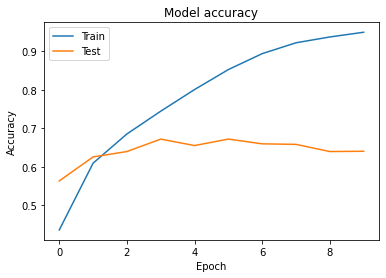

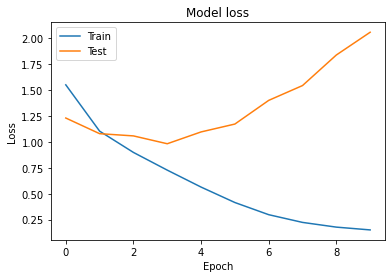

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

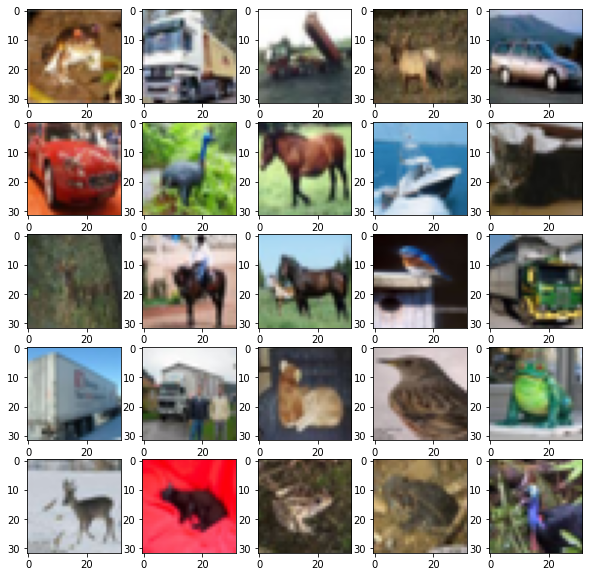

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) #burda eger farklı sayıda atlatmak istersek onu yazabiliriz.
    plt.imshow(x_train[i],cmap='gray')

In [10]:
import tensorflow as tf

from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000,32,32,3)
x_test = x_test.reshape(10000,32,32,3)
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')
x_train/=255
x_test/=255
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(32,32,3)),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Dropout(0.25),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(10, activation='softmax'),])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test,y_test))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
1563/1563 [==============================] - 174s 111ms/step - loss: 1.7772 - accuracy: 0.3501 - val_loss: 1.3575 - val_accuracy: 0.5100
Epoch 2/10
1563/1563 [==============================] - 174s 111ms/step - loss: 1.4010 - accuracy: 0.4969 - val_loss: 1.1772 - val_accuracy: 0.5732
Epoch 3/10
1563/1563 [==============================] - 174s 111ms/step - loss: 1.2384 - accuracy: 0.5616 - val_loss: 1.0813 - val_accuracy: 0.6268
Epoch 4/10
1563/1563 [==============================] - 175s 112ms/step - loss: 1.1338 - accuracy: 0.6002 - val_loss: 1.0717 - val_accuracy: 0.6236
Epoch 5/10
1563/1563 [==============================] - 174s 112ms/step - loss: 1.0654 - accuracy: 0.6239 - val_loss: 1.0293 - val_accuracy: 0.6389
Epoch 6/10
1563/1563 [==============================] - 175s 112ms/step - loss: 0.9992 - accuracy: 0.6467 - val_loss: 0.9807 - val_accuracy: 0.6565
Epoch 7/10
1563/1563 [==============================] - 176s 113ms/step - loss: 0.9463 - accuracy: 0.6662 - val_

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 9s 28ms/step - loss: 0.9713 - accuracy: 0.6692
Test loss: 0.9712575078010559
Test accuracy: 0.6692000031471252
